# **Project Name**    - **Appliance Energy Prediction**



##### **Project Type**    - Regression
##### **Contribution**    - Team
##### **Team Member 1 -** Samadhan Tangde
##### **Team Member 2 -**
##### **Team Member 3 -**
##### **Team Member 4 -**

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

https://github.com/1002Sam/Regression-Project---Appliance-Energy-Prediction.git

# **Problem Statement**


**Write Problem Statement Here.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime as dt
import warnings
warnings.filterwarnings('ignore')
import missingno as mno
pd.set_option('display.max_columns', None)  #This is for displaying all columns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split      #look@
from sklearn import ensemble    #look@

### Dataset Loading

In [ ]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/AlmaBetter /Machine Learning/2. Capstone Project - Regression/data_application_energy.csv')

### Dataset First View

In [ ]:
# Dataset First Look
data.round(2)

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.60,19.20,44.79,19.79,44.73,19.00,45.57,17.17,55.20,7.03,84.26,17.20,41.63,18.20,48.90,17.03,45.53,6.60,733.5,92.00,7.00,63.00,5.30,13.28,13.28
1,2016-01-11 17:10:00,60,30,19.89,46.69,19.20,44.72,19.79,44.79,19.00,45.99,17.17,55.20,6.83,84.06,17.20,41.56,18.20,48.86,17.07,45.56,6.48,733.6,92.00,6.67,59.17,5.20,18.61,18.61
2,2016-01-11 17:20:00,50,30,19.89,46.30,19.20,44.63,19.79,44.93,18.93,45.89,17.17,55.09,6.56,83.16,17.20,41.43,18.20,48.73,17.00,45.50,6.37,733.7,92.00,6.33,55.33,5.10,28.64,28.64
3,2016-01-11 17:30:00,50,40,19.89,46.07,19.20,44.59,19.79,45.00,18.89,45.72,17.17,55.09,6.43,83.42,17.13,41.29,18.10,48.59,17.00,45.40,6.25,733.8,92.00,6.00,51.50,5.00,45.41,45.41
4,2016-01-11 17:40:00,60,40,19.89,46.33,19.20,44.53,19.79,45.00,18.89,45.53,17.20,55.09,6.37,84.89,17.20,41.23,18.10,48.59,17.00,45.40,6.13,733.9,92.00,5.67,47.67,4.90,10.08,10.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,2016-05-27 17:20:00,100,0,25.57,46.56,25.89,42.03,27.20,41.16,24.70,45.59,23.20,52.40,24.80,1.00,24.50,44.50,24.70,50.07,23.20,46.79,22.73,755.2,55.67,3.33,23.67,13.33,43.10,43.10
19731,2016-05-27 17:30:00,90,0,25.50,46.50,25.75,42.08,27.13,41.22,24.70,45.59,23.23,52.33,24.20,1.00,24.56,44.41,24.70,49.79,23.20,46.79,22.60,755.2,56.00,3.50,24.50,13.30,49.28,49.28
19732,2016-05-27 17:40:00,270,10,25.50,46.60,25.63,42.77,27.05,41.69,24.70,45.73,23.23,52.27,23.63,1.00,24.54,44.40,24.70,49.66,23.20,46.79,22.47,755.2,56.33,3.67,25.33,13.27,29.20,29.20
19733,2016-05-27 17:50:00,420,10,25.50,46.99,25.41,43.04,26.89,41.29,24.70,45.79,23.20,52.20,22.43,1.00,24.50,44.30,24.66,49.52,23.20,46.82,22.33,755.2,56.67,3.83,26.17,13.23,6.32,6.32


In [ ]:
data.head().round(2)  #Top 5 rows of dataset

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.60,19.2,44.79,19.79,44.73,19.00,45.57,17.17,55.20,7.03,84.26,17.20,41.63,18.2,48.90,17.03,45.53,6.60,733.5,92.0,7.00,63.00,5.3,13.28,13.28
1,2016-01-11 17:10:00,60,30,19.89,46.69,19.2,44.72,19.79,44.79,19.00,45.99,17.17,55.20,6.83,84.06,17.20,41.56,18.2,48.86,17.07,45.56,6.48,733.6,92.0,6.67,59.17,5.2,18.61,18.61
2,2016-01-11 17:20:00,50,30,19.89,46.30,19.2,44.63,19.79,44.93,18.93,45.89,17.17,55.09,6.56,83.16,17.20,41.43,18.2,48.73,17.00,45.50,6.37,733.7,92.0,6.33,55.33,5.1,28.64,28.64
3,2016-01-11 17:30:00,50,40,19.89,46.07,19.2,44.59,19.79,45.00,18.89,45.72,17.17,55.09,6.43,83.42,17.13,41.29,18.1,48.59,17.00,45.40,6.25,733.8,92.0,6.00,51.50,5.0,45.41,45.41
4,2016-01-11 17:40:00,60,40,19.89,46.33,19.2,44.53,19.79,45.00,18.89,45.53,17.20,55.09,6.37,84.89,17.20,41.23,18.1,48.59,17.00,45.40,6.13,733.9,92.0,5.67,47.67,4.9,10.08,10.08


In [ ]:
data.tail().round(2) #Bottom 5 rows of dataset

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
19730,2016-05-27 17:20:00,100,0,25.57,46.56,25.89,42.03,27.20,41.16,24.7,45.59,23.20,52.40,24.80,1.0,24.50,44.50,24.70,50.07,23.2,46.79,22.73,755.2,55.67,3.33,23.67,13.33,43.10,43.10
19731,2016-05-27 17:30:00,90,0,25.50,46.50,25.75,42.08,27.13,41.22,24.7,45.59,23.23,52.33,24.20,1.0,24.56,44.41,24.70,49.79,23.2,46.79,22.60,755.2,56.00,3.50,24.50,13.30,49.28,49.28
19732,2016-05-27 17:40:00,270,10,25.50,46.60,25.63,42.77,27.05,41.69,24.7,45.73,23.23,52.27,23.63,1.0,24.54,44.40,24.70,49.66,23.2,46.79,22.47,755.2,56.33,3.67,25.33,13.27,29.20,29.20
19733,2016-05-27 17:50:00,420,10,25.50,46.99,25.41,43.04,26.89,41.29,24.7,45.79,23.20,52.20,22.43,1.0,24.50,44.30,24.66,49.52,23.2,46.82,22.33,755.2,56.67,3.83,26.17,13.23,6.32,6.32
19734,2016-05-27 18:00:00,430,10,25.50,46.60,25.26,42.97,26.82,41.16,24.7,45.96,23.20,52.20,21.03,1.0,24.50,44.05,24.74,49.74,23.2,46.84,22.20,755.2,57.00,4.00,27.00,13.20,34.12,34.12


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
data.shape

(19735, 29)

In [ ]:
# Checking number of rows and columns of the dataset using shape
print("Number of rows/instances are: ",data.shape[0])
print("Number of columns/attributes are: ",data.shape[1])

Number of rows/instances are:  19735
Number of columns/attributes are:  29


### Dataset Information

In [ ]:
# Dataset Info
data.info() #Analyzing dataset information with info function

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
data.duplicated(keep= 'first').sum()  #Checking duplicate 'rows' count in the dataset and keeping first of them if any duplicates.

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
data.isna().sum()      #Checking missing/null values count for each column

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

<Axes: >

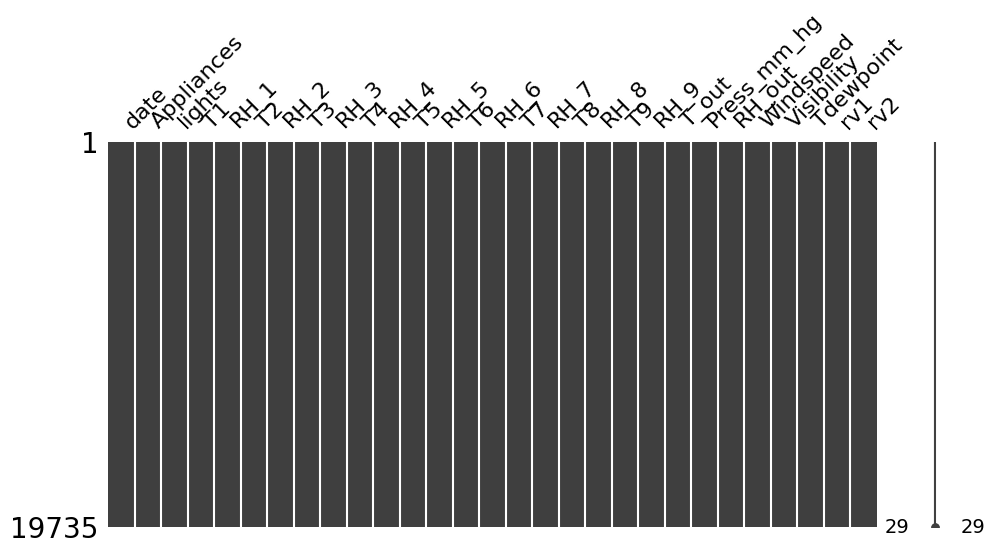

In [ ]:
# Visualizing the missing values

mno.matrix(data, figsize = (11, 5))  #Visualizing null/missing values with the matrix graph

### What did you know about your dataset?

The Dataset consists of a total of 29 feature columns. 

The total number of observations(rows) are 19735.

Appliances is the dependent variable column.

There are no duplicate rows in the dataset.

Also there are no missing values or Null values in the dataset.

All the features is numerical data except one object named 'date'(going to convert in datetime) so doing preprocessing is much easier.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
data.columns   #Skimming through columns/variables 

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [ ]:
# Dataset Describe
data.describe(include= 'all').round(2)

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735,19735.00,19735.00,19735.00,19735.00,19735.00,19735.00,19735.00,19735.00,19735.00,19735.00,19735.00,19735.00,19735.00,19735.00,19735.00,19735.00,19735.00,19735.00,19735.00,19735.00,19735.00,19735.00,19735.00,19735.00,19735.00,19735.00,19735.00,19735.00
unique,19735,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2016-01-11 17:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,97.69,3.80,21.69,40.26,20.34,40.42,22.27,39.24,20.86,39.03,19.59,50.95,7.91,54.61,20.27,35.39,22.03,42.94,19.49,41.55,7.41,755.52,79.75,4.04,38.33,3.76,24.99,24.99
std,NaN,102.52,7.94,1.61,3.98,2.19,4.07,2.01,3.25,2.04,4.34,1.84,9.02,6.09,31.15,2.11,5.11,1.96,5.22,2.01,4.15,5.32,7.40,14.90,2.45,11.79,4.19,14.50,14.50
min,NaN,10.00,0.00,16.79,27.02,16.10,20.46,17.20,28.77,15.10,27.66,15.33,29.82,-6.06,1.00,15.39,23.20,16.31,29.60,14.89,29.17,-5.00,729.30,24.00,0.00,1.00,-6.60,0.01,0.01
25%,NaN,50.00,0.00,20.76,37.33,18.79,37.90,20.79,36.90,19.53,35.53,18.28,45.40,3.63,30.02,18.70,31.50,20.79,39.07,18.00,38.50,3.67,750.93,70.33,2.00,29.00,0.90,12.50,12.50
50%,NaN,60.00,0.00,21.60,39.66,20.00,40.50,22.10,38.53,20.67,38.40,19.39,49.09,7.30,55.29,20.03,34.86,22.10,42.38,19.39,40.90,6.92,756.10,83.67,3.67,40.00,3.43,24.90,24.90
75%,NaN,100.00,0.00,22.60,43.07,21.50,43.26,23.29,41.76,22.10,42.16,20.62,53.66,11.26,83.23,21.60,39.00,23.39,46.54,20.60,44.34,10.41,760.93,91.67,5.50,40.00,6.57,37.58,37.58


### Variables Description 

There are 29 features to describe appliances energy use :

1. date : time year-month-day hour:minute:second
2. lights : energy use of light fixtures in the house in Wh
3. T1 : Temperature in kitchen area, in Celsius
4. T2 : Temperature in living room area, in Celsius
5. T3 : Temperature in laundry room area
6. T4 : Temperature in office room, in Celsius
7. T5 : Temperature in bathroom, in Celsius
8. T6 : Temperature outside the building (north side), in Celsius
9. T7 : Temperature in ironing room, in Celsius
10. T8 : Temperature in teenager room 2, in Celsius
11. T9 : Temperature in parents’ room, in Celsius
12. T_out : Temperature outside (from Chievres weather station), in Celsius
13. Tdewpoint : (from Chievres weather station), Â°C
14. RH_1 : Humidity in kitchen area, in %
15. RH_2 : Humidity in living room area, in %
16. RH_3 : Humidity in laundry room area, in %
17. RH_4 : Humidity in office room, in %
18. RH_5 : Humidity in bathroom, in %
19. RH_6 : Humidity outside the building (north side), in %
20. RH_7 : Humidity in ironing room, in %
21. RH_8 : Humidity in teenager room 2, in %
22. RH_9 : Humidity in parents’ room, in %
23. RH_out :Humidity outside (from Chievres weather station), in %
24. Pressure : (from Chievres weather station), in mm Hg
25. Wind speed: (from Chievres weather station), in m/s
26. Visibility :(from Chievres weather station), in km
27. Rv1 :Random variable 1, non-dimensional
28. Rv2 :Random variable 2, non-dimensional
29. Appliances : Total energy used by appliances, in Wh

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.

data.apply(lambda x: len(x.unique()))


date           19735
Appliances        92
lights             8
T1               722
RH_1            2547
T2              1650
RH_2            3376
T3              1426
RH_3            2618
T4              1390
RH_4            2987
T5              2263
RH_5            7571
T6              4446
RH_6            9709
T7              1955
RH_7            5891
T8              2228
RH_8            6649
T9               924
RH_9            3388
T_out           1730
Press_mm_hg     2189
RH_out           566
Windspeed        189
Visibility       413
Tdewpoint       1409
rv1            19735
rv2            19735
dtype: int64

In [ ]:
for column in data.columns:
    unique_values = data[column].unique()
    if pd.api.types.is_numeric_dtype(data[column]):
        rounded_values = [round(value, 2) for value in unique_values]
    else:
        rounded_values = unique_values
    print(f"Unique values for {column}: {rounded_values}")

Unique values for date: ['2016-01-11 17:00:00' '2016-01-11 17:10:00' '2016-01-11 17:20:00' ...
 '2016-05-27 17:40:00' '2016-05-27 17:50:00' '2016-05-27 18:00:00']
Unique values for Appliances: [60, 50, 70, 230, 580, 430, 250, 100, 90, 80, 140, 120, 190, 110, 400, 390, 240, 40, 30, 310, 380, 370, 20, 260, 500, 450, 220, 170, 290, 130, 200, 210, 180, 350, 300, 340, 150, 330, 420, 520, 360, 270, 550, 690, 620, 610, 490, 410, 320, 740, 910, 510, 790, 460, 160, 480, 280, 560, 1080, 750, 470, 440, 800, 540, 530, 660, 630, 600, 10, 570, 830, 1070, 890, 590, 850, 710, 680, 670, 780, 640, 650, 700, 770, 720, 760, 860, 880, 730, 900, 820, 870, 840]
Unique values for lights: [30, 40, 50, 70, 60, 10, 20, 0]
Unique values for T1: [19.89, 19.86, 19.79, 19.93, 20.07, 20.13, 20.26, 20.43, 20.57, 20.73, 20.86, 20.89, 20.96, 21.03, 21.1, 21.13, 21.2, 21.29, 21.36, 21.39, 21.5, 21.53, 21.6, 21.26, 21.17, 21.08, 21.0, 20.93, 20.79, 20.7, 20.6, 20.5, 20.39, 20.29, 20.23, 20.2, 20.17, 20.1, 20.03, 20.0, 19.

In [ ]:
data['Appliances'].unique()   #Unique values array

array([  60,   50,   70,  230,  580,  430,  250,  100,   90,   80,  140,
        120,  190,  110,  400,  390,  240,   40,   30,  310,  380,  370,
         20,  260,  500,  450,  220,  170,  290,  130,  200,  210,  180,
        350,  300,  340,  150,  330,  420,  520,  360,  270,  550,  690,
        620,  610,  490,  410,  320,  740,  910,  510,  790,  460,  160,
        480,  280,  560, 1080,  750,  470,  440,  800,  540,  530,  660,
        630,  600,   10,  570,  830, 1070,  890,  590,  850,  710,  680,
        670,  780,  640,  650,  700,  770,  720,  760,  860,  880,  730,
        900,  820,  870,  840])

In [ ]:
counts = data['Appliances'].value_counts()  #Checking unique values for Appliances column and sorting in descending order with their frequency. 
counts

50      4368
60      3282
40      2019
70      1560
80      1205
        ... 
890        1
1070       1
910        1
1080       1
840        1
Name: Appliances, Length: 92, dtype: int64

In [ ]:
len(data[data['Appliances']>=50])

16641

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Before doing any data wrangling lets create copy of the dataset because further Machine Learning section it won't cause problem
data1 = data.copy()

In [ ]:
temp = {
    'T1' : 'kitchen_temp', 'T2' : 'living_temp', 'T3' : 'laundry_temp', 
    'T4' : 'office_temp', 'T5' : 'bath_temp', 'T6' : 'outside_temp',
    'T7' : 'ironing_temp', 'T8' : 'teen_temp', 'T9' : 'parents_temp',
    }

humid = {
    'RH_1' : 'kitchen_humid', 'RH_2' : 'living_humid', 'RH_3' : 'laundry_humid', 
    'RH_4' : 'office_humid', 'RH_5' : 'bath_humid', 'RH_6' : 'outside_humid',
    'RH_7' : 'ironing_humid', 'RH_8' : 'teen_humid', 'RH_9' : 'parents_humid',
    }

renaming_temp = data1.rename(columns = temp, inplace= True)
renaming_humid = data1.rename(columns = humid, inplace= True)    

weather = ['T_out', 'Tdewpoint','RH_out','Press_mm_hg',
                'Windspeed','Visibility'] 

randoms = ['rv1', 'rv2']

date_col = ['date']

light_col = ['lights']

target = ['Appliances']

In [ ]:
# Create a list of independent variables
independent_variables = list(set(data1.columns.tolist()) - {'target'})
independent_variables

['parents_humid',
 'kitchen_humid',
 'date',
 'parents_temp',
 'laundry_temp',
 'ironing_temp',
 'T_out',
 'living_temp',
 'rv1',
 'RH_out',
 'lights',
 'Windspeed',
 'Visibility',
 'teen_temp',
 'rv2',
 'teen_humid',
 'outside_humid',
 'laundry_humid',
 'Press_mm_hg',
 'bath_temp',
 'kitchen_temp',
 'Tdewpoint',
 'Appliances',
 'living_humid',
 'ironing_humid',
 'office_humid',
 'office_temp',
 'outside_temp',
 'bath_humid']

In [ ]:
data1.lights.value_counts()  #Checking unique values for lights column and sorting in descending order with their frequency. 

0     15252
10     2212
20     1624
30      559
40       77
50        9
70        1
60        1
Name: lights, dtype: int64

In [ ]:
#From preprocessing we get to know that, 'maximum values in lights attribute is 0, so it wont be playing much role in our model. 
#That's why we are dropping the lights attribute from our dataset.
data1= data1.drop('lights', axis=1)

In [ ]:
#converting date variable from object into datetime datatype
data1['date'] = pd.to_datetime(data1['date'])

# Extract different components from the date
data1['month'] = data1['date'].dt.month
data1['day'] = data1['date'].dt.day
data1['hour'] = data1['date'].dt.hour
data1['day_of_week'] = data1['date'].dt.dayofweek

# Create weekends column based on day_of_week
data1['weekends'] = np.where(data1['day_of_week'].isin([5, 6]), True, False)

In [ ]:
#Converting dtype bool into int in 'weekends' column for readyness in visualization
data1['weekends'] = data1['weekends'].astype(int)

#converting month number to month name for monthwise analysis
data1['month'] = data1['date'].dt.month_name()

In [ ]:
data1['weekends'].value_counts()

0    14263
1     5472
Name: weekends, dtype: int64

In [ ]:
#As we are not trying to analyze the problem as Time Series rather regress on "Appliance" column.

# defining categorical independent variables separately
cat_var = ['year',	'month',	'day',	'day_of_week',	'weekends']

In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 33 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           19735 non-null  datetime64[ns]
 1   Appliances     19735 non-null  int64         
 2   kitchen_temp   19735 non-null  float64       
 3   kitchen_humid  19735 non-null  float64       
 4   living_temp    19735 non-null  float64       
 5   living_humid   19735 non-null  float64       
 6   laundry_temp   19735 non-null  float64       
 7   laundry_humid  19735 non-null  float64       
 8   office_temp    19735 non-null  float64       
 9   office_humid   19735 non-null  float64       
 10  bath_temp      19735 non-null  float64       
 11  bath_humid     19735 non-null  float64       
 12  outside_temp   19735 non-null  float64       
 13  outside_humid  19735 non-null  float64       
 14  ironing_temp   19735 non-null  float64       
 15  ironing_humid  1973

In [ ]:
data1.round(2)

,date,Appliances,kitchen_temp,kitchen_humid,living_temp,living_humid,laundry_temp,laundry_humid,office_temp,office_humid,bath_temp,bath_humid,outside_temp,outside_humid,ironing_temp,ironing_humid,teen_temp,teen_humid,parents_temp,parents_humid,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,month,day,hour,day_of_week,weekends
0,2016-01-11 17:00:00,60,19.89,47.60,19.20,44.79,19.79,44.73,19.00,45.57,17.17,55.20,7.03,84.26,17.20,41.63,18.20,48.90,17.03,45.53,6.60,733.5,92.00,7.00,63.00,5.30,13.28,13.28,January,11,17,0,0
1,2016-01-11 17:10:00,60,19.89,46.69,19.20,44.72,19.79,44.79,19.00,45.99,17.17,55.20,6.83,84.06,17.20,41.56,18.20,48.86,17.07,45.56,6.48,733.6,92.00,6.67,59.17,5.20,18.61,18.61,January,11,17,0,0
2,2016-01-11 17:20:00,50,19.89,46.30,19.20,44.63,19.79,44.93,18.93,45.89,17.17,55.09,6.56,83.16,17.20,41.43,18.20,48.73,17.00,45.50,6.37,733.7,92.00,6.33,55.33,5.10,28.64,28.64,January,11,17,0,0
3,2016-01-11 17:30:00,50,19.89,46.07,19.20,44.59,19.79,45.00,18.89,45.72,17.17,55.09,6.43,83.42,17.13,41.29,18.10,48.59,17.00,45.40,6.25,733.8,92.00,6.00,51.50,5.00,45.41,45.41,January,11,17,0,0
4,2016-01-11 17:40:00,60,19.89,46.33,19.20,44.53,19.79,45.00,18.89,45.53,17.20,55.09,6.37,84.89,17.20,41.23,18.10,48.59,17.00,45.40,6.13,733.9,92.00,5.67,47.67,4.90,10.08,10.08,January,11,17,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,2016-05-27 17:20:00,100,25.57,46.56,25.89,42.03,27.20,41.16,24.70,45.59,23.20,52.40,24.80,1.00,24.50,44.50,24.70,50.07,23.20,46.79,22.73,755.2,55.67,3.33,23.67,13.33,43.10,43.10,May,27,17,4,0
19731,2016-05-27 17:30:00,90,25.50,46.50,25.75,42.08,27.13,41.22,24.70,45.59,23.23,52.33,24.20,1.00,24.56,44.41,24.70,49.79,23.20,46.79,22.60,755.2,56.00,3.50,24.50,13.30,49.28,49.28,May,27,17,4,0
19732,2016-05-27 17:40:00,270,25.50,46.60,25.63,42.77,27.05,41.69,24.70,45.73,23.23,52.27,23.63,1.00,24.54,44.40,24.70,49.66,23.20,46.79,22.47,755.2,56.33,3.67,25.33,13.27,29.20,29.20,May,27,17,4,0
19733,2016-05-27 17:50:00,420,25.50,46.99,25.41,43.04,26.89,41.29,24.70,45.79,23.20,52.20,22.43,1.00,24.50,44.30,24.66,49.52,23.20,46.82,22.33,755.2,56.67,3.83,26.17,13.23,6.32,6.32,May,27,17,4,0


### What all manipulations have you done and insights you found?

The dataset doesn't have NaN and missing values to impute. 

I just changed the datatype of "date" variable to pandas datetime object and made it as identifier/primary key for our dataframe, as all data are unique for each observation. 

Added some columns to dataframe which will help us to deep dive into data visualization.

Weekends column created and converted bool values to integer 1&0 to anlyze consumption pattern during weekend and converted month number to month name.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

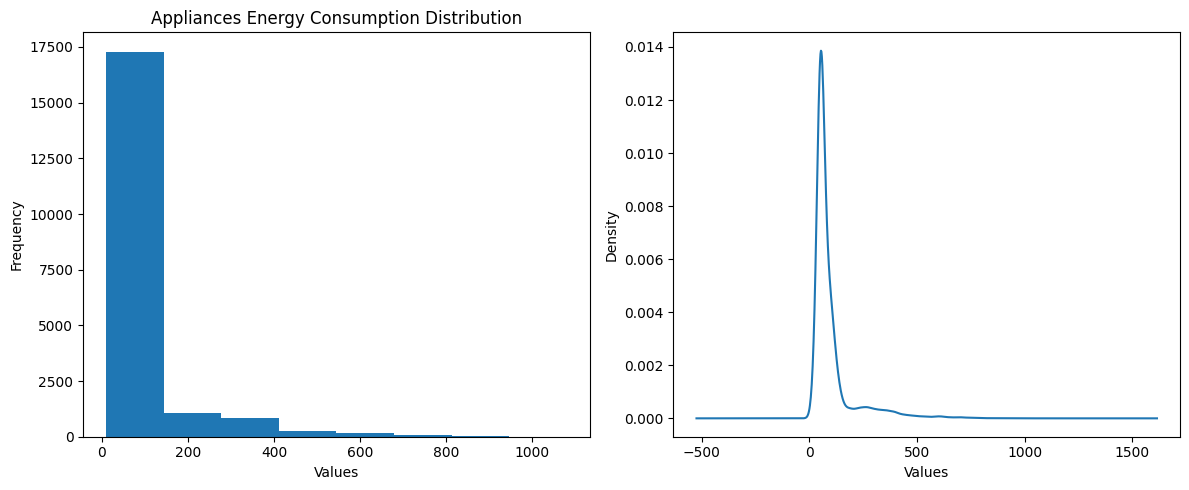

In [ ]:
# Chart - 1 visualization code

#Distribution of values in Applainces column
# Create the figure and subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
ax = axes.flatten()

# Plot histogram on the first subplot
ax[0].hist(data1['Appliances'], bins=8)
ax[0].set_xlabel('Values')
ax[0].set_ylabel('Frequency')
ax[0].set_title('Appliances Energy Consumption Distribution')

# Plot KDE on the second subplot
data1['Appliances'].plot(kind='kde', ax=ax[1])
ax[1].set_xlabel('Values')
ax[1].set_ylabel('Density')

plt.tight_layout()  # Adjusts the spacing between subplots
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

<Axes: >

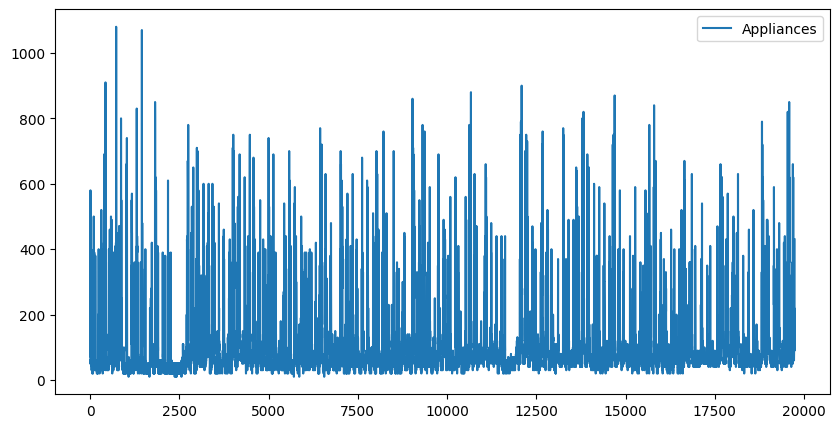

In [ ]:
# Chart - 2 visualization code
#Setting date as a index of DataFrame because our date and time is disctict for every observation. 
#data1.set_index('date', inplace=False)
data1.set_index(data1.date.copy(deep=True),inplace=True)
#creating a lineplot for appliances vs Datetime
data[['Appliances']].plot(figsize= (10,5))

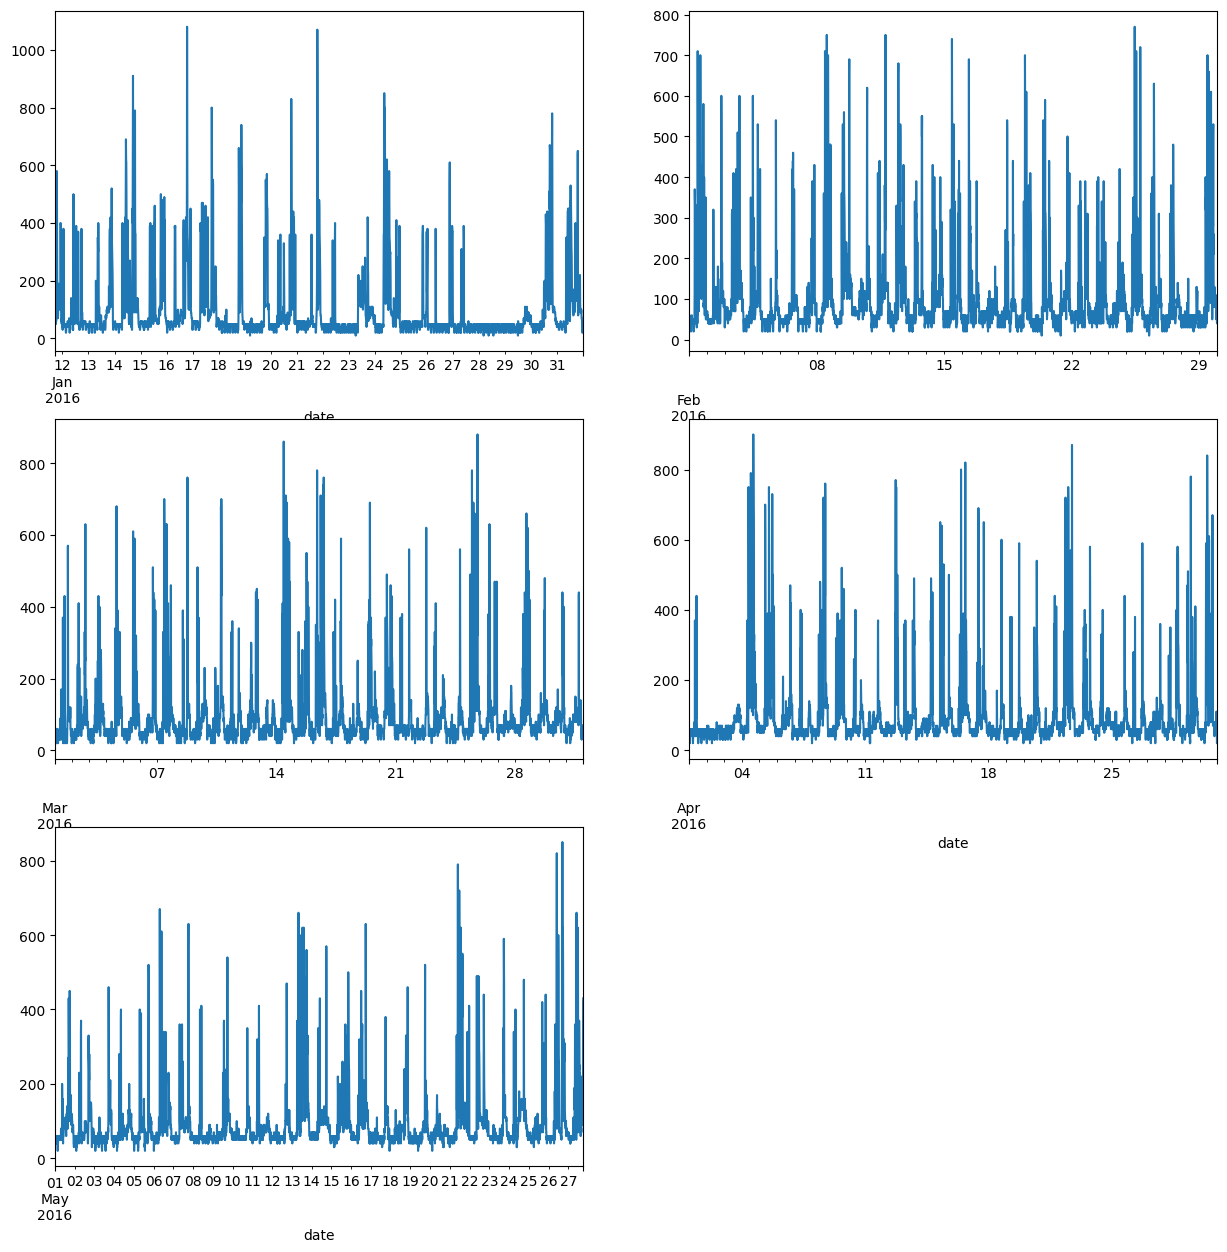

In [ ]:
#Creating plot for date vs appliance consumption for different months separately
for month in [1,2,3,4,5]:
    plt.subplot(3,2,month)
    data1[data1['date'].dt.month == month]['Appliances'].plot(figsize= (15,15))

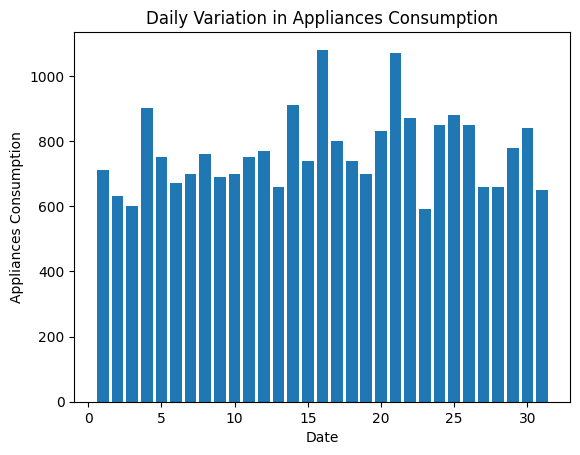

In [ ]:

plt.bar(data1['day'], data1['Appliances'])
plt.xlabel('Date')
plt.ylabel('Appliances Consumption')
plt.title('Daily Variation in Appliances Consumption')
plt.show()

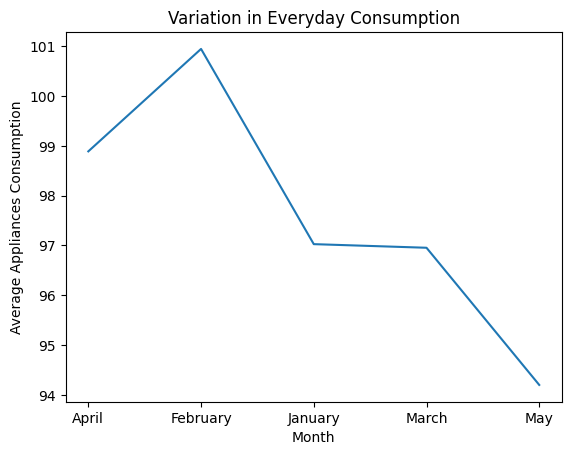

In [ ]:
monthly_average = data1.groupby('month')['Appliances'].mean()

plt.plot(monthly_average.index, monthly_average.values)
plt.xlabel('Month')
plt.ylabel('Average Appliances Consumption')
plt.title('Variation in Everyday Consumption')
plt.show()

Text(0.5, 1.0, 'Room Availability throughout Neighbourhood/Room Type')

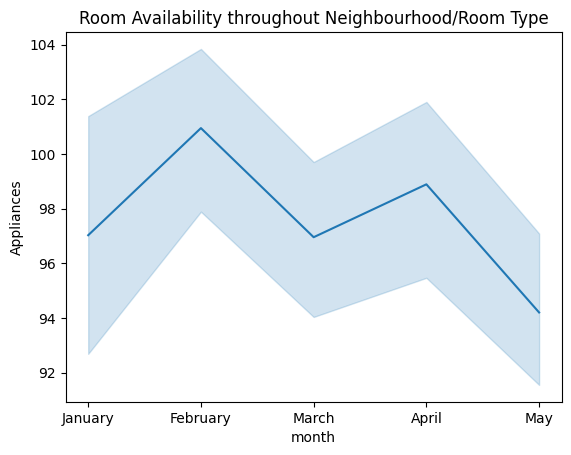

In [ ]:
sns.lineplot(data=data1, x='month', y='Appliances')
plt.title('Room Availability throughout Neighbourhood/Room Type')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

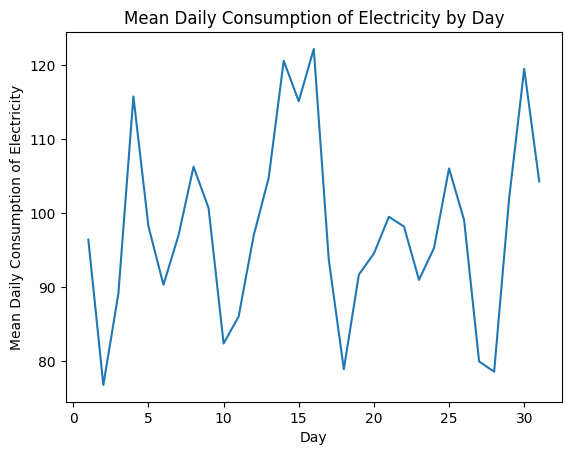

In [ ]:
# Chart - 3 visualization code

mean_daily_consumption = data1.groupby('day')['Appliances'].mean()  #can use bar plot also

plt.plot(mean_daily_consumption.index, mean_daily_consumption.values)
plt.xlabel('Day')
plt.ylabel('Mean Daily Consumption of Electricity')
plt.title('Mean Daily Consumption of Electricity by Day')
plt.show()

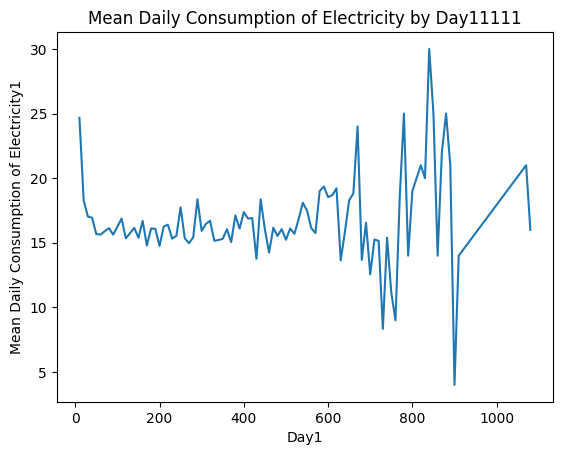

In [ ]:
mean_daily_consumption = data1.groupby('Appliances')['day'].mean()

plt.plot(mean_daily_consumption.index, mean_daily_consumption.values)
plt.xlabel('Day1')
plt.ylabel('Mean Daily Consumption of Electricity1')
plt.title('Mean Daily Consumption of Electricity by Day11111')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

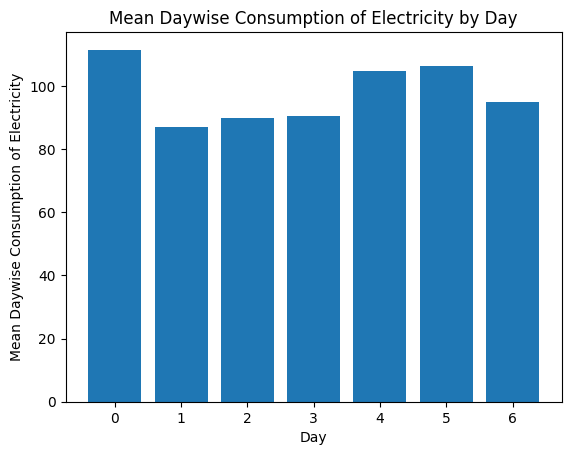

In [ ]:
# Chart - 4 visualization code

mean_daywise_consumption = data1.groupby('day_of_week')['Appliances'].mean()  #can use bar plot also

plt.bar(mean_daywise_consumption.index, mean_daywise_consumption.values)
plt.xlabel('Day')
plt.ylabel('Mean Daywise Consumption of Electricity')
plt.title('Mean Daywise Consumption of Electricity by Day')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

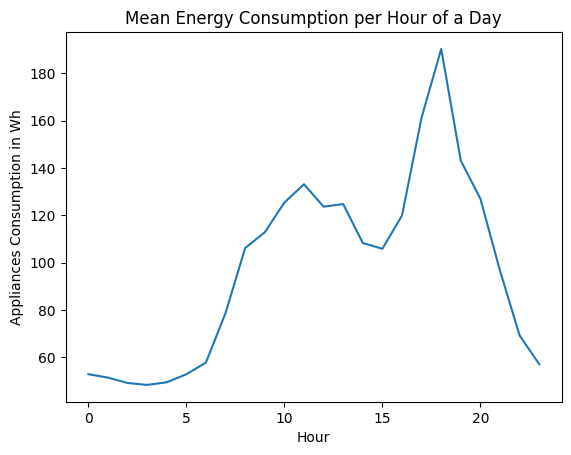

In [ ]:
# Chart - 5 visualization code

mean_hourly_consumption = data1.groupby('hour')['Appliances'].mean()  #can use bar plot also

plt.plot(mean_hourly_consumption.index, mean_hourly_consumption.values)
plt.xlabel('Hour')
plt.ylabel('Appliances Consumption in Wh')
plt.title('Mean Energy Consumption per Hour of a Day')
plt.show()

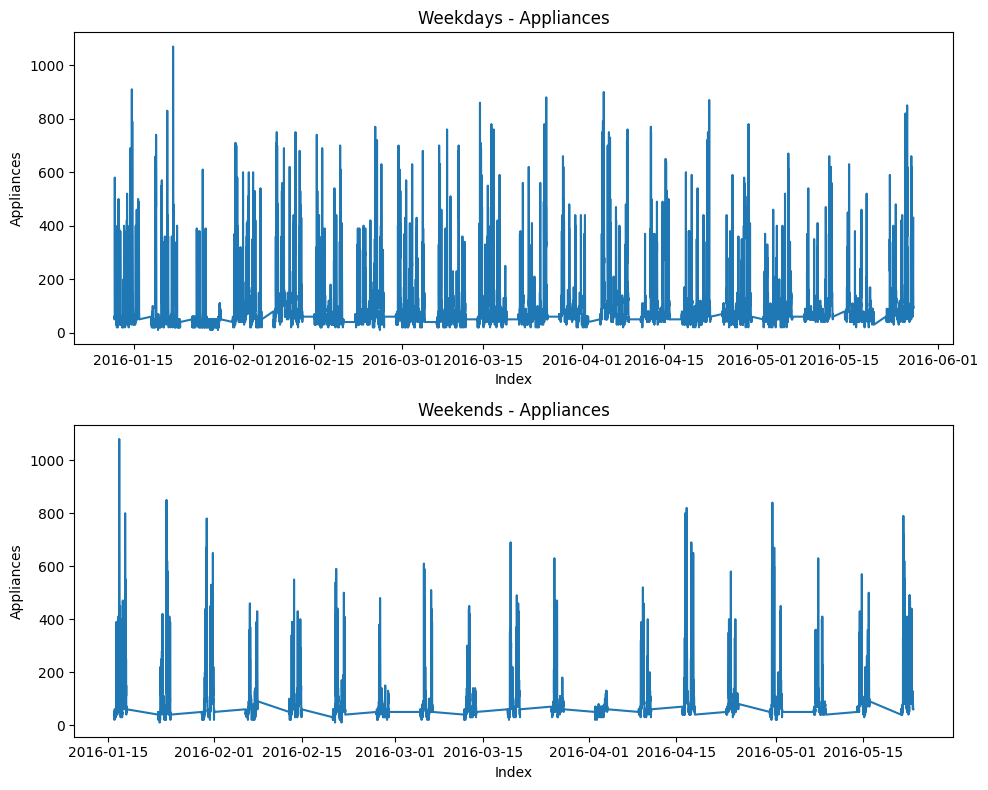

In [ ]:
# Filter data for weekdays
weekdays_data = data1[data1['weekends'] == 0]

# Filter data for weekends
weekends_data = data1[data1['weekends'] == 1]

# Create two subplots for weekdays and weekends
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Plot for weekdays
ax1.plot(weekdays_data.index, weekdays_data['Appliances'])
ax1.set_xlabel('Index')
ax1.set_ylabel('Appliances')
ax1.set_title('Weekdays - Appliances')

# Plot for weekends
ax2.plot(weekends_data.index, weekends_data['Appliances'])
ax2.set_xlabel('Index')
ax2.set_ylabel('Appliances')
ax2.set_title('Weekends - Appliances')

plt.tight_layout()
plt.show()

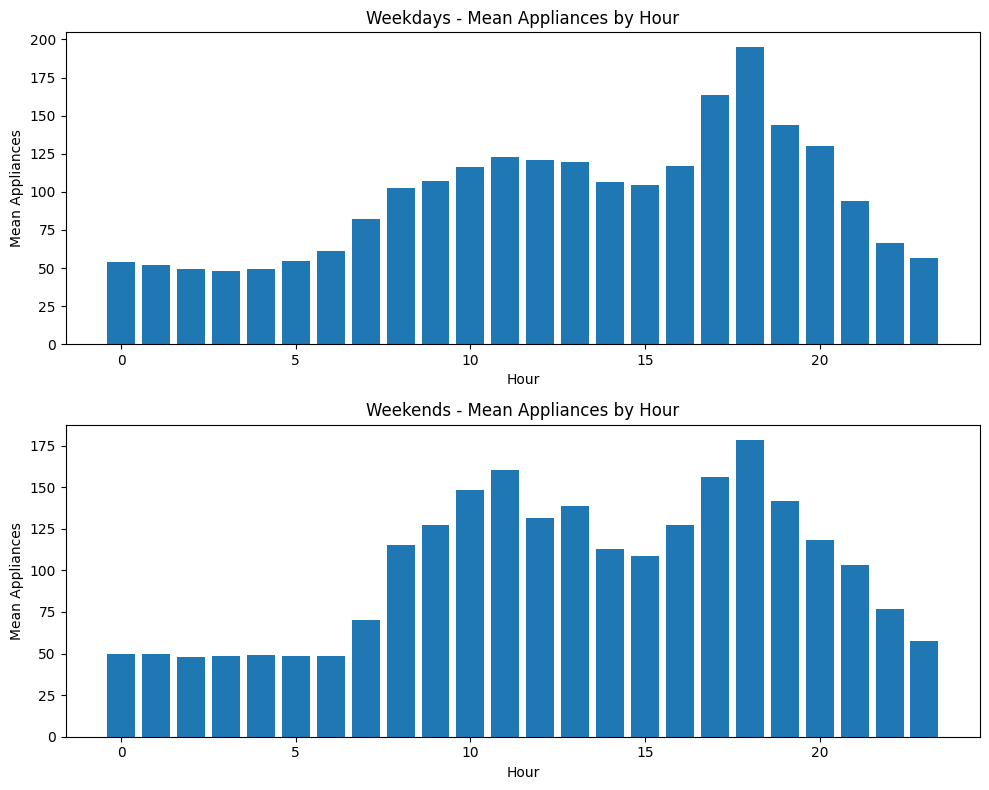

In [ ]:
# Group data by hour and weekends
grouped_data = data1.groupby(['hour', 'weekends'])['Appliances'].mean().reset_index()

# Filter data for weekdays
weekdays_data = grouped_data[grouped_data['weekends'] == 0]

# Filter data for weekends
weekends_data = grouped_data[grouped_data['weekends'] == 1]

# Create two subplots for weekdays and weekends
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Plot for weekdays
ax1.bar(weekdays_data['hour'], weekdays_data['Appliances'])
ax1.set_xlabel('Hour')
ax1.set_ylabel('Mean Appliances')
ax1.set_title('Weekdays - Mean Appliances by Hour')

# Plot for weekends
ax2.bar(weekends_data['hour'], weekends_data['Appliances'])
ax2.set_xlabel('Hour')
ax2.set_ylabel('Mean Appliances')
ax2.set_title('Weekends - Mean Appliances by Hour')

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

<Axes: xlabel='Appliances', ylabel='Density'>

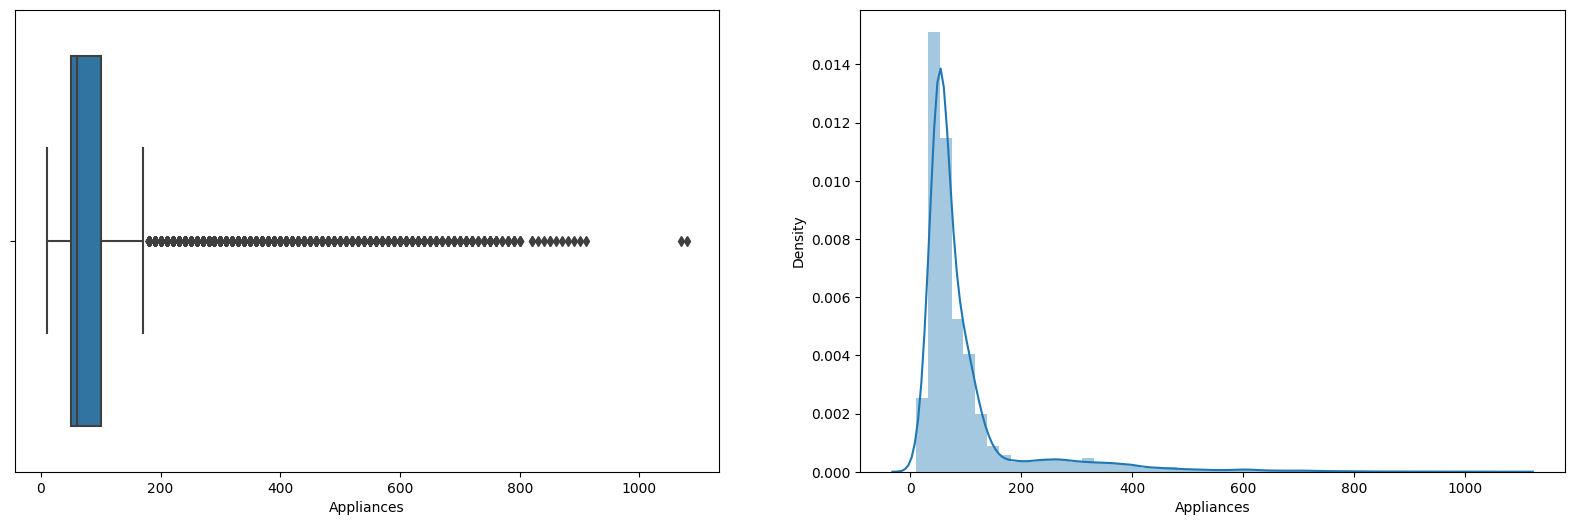

<Figure size 1000x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

In [ ]:
# Chart - 6 visualization code
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
ax = axes.flatten()

# boxplot appliances
plt.figure(figsize=(10,6))
sns.boxplot(x="Appliances", data=data1, ax=ax[0])

#Distribution plot for Appliances against Consumption in Wh
plt.figure(figsize=(12,6))
sns.distplot(data1['Appliances'], ax=ax[1])

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

<Axes: xlabel='Log_Appliances', ylabel='Density'>

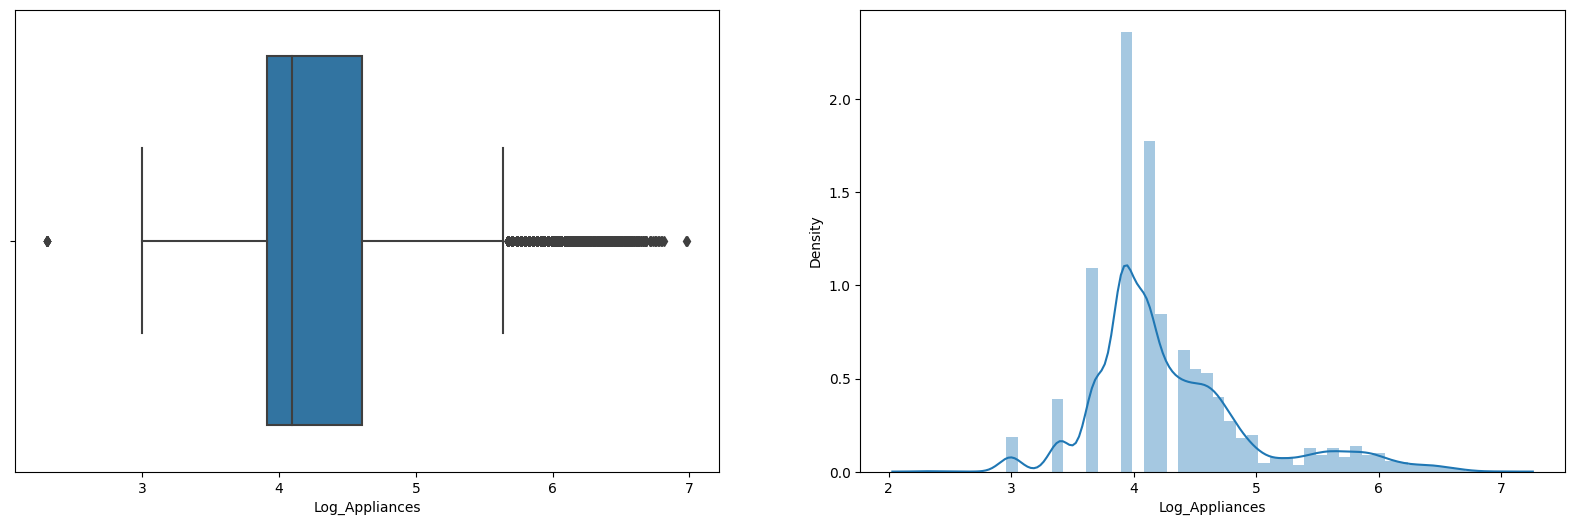

<Figure size 1000x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

In [ ]:
# Chart - 7 visualization code

data1['Log_Appliances'] = np.log(data1.Appliances)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
ax = axes.flatten()

# boxplot appliances
plt.figure(figsize=(10,6))
sns.boxplot(x="Log_Appliances", data=data1, ax=ax[0])

#Distribution plot for Appliances against Consumption in Wh
plt.figure(figsize=(12,6))
sns.distplot(data1['Log_Appliances'], ax=ax[1])

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

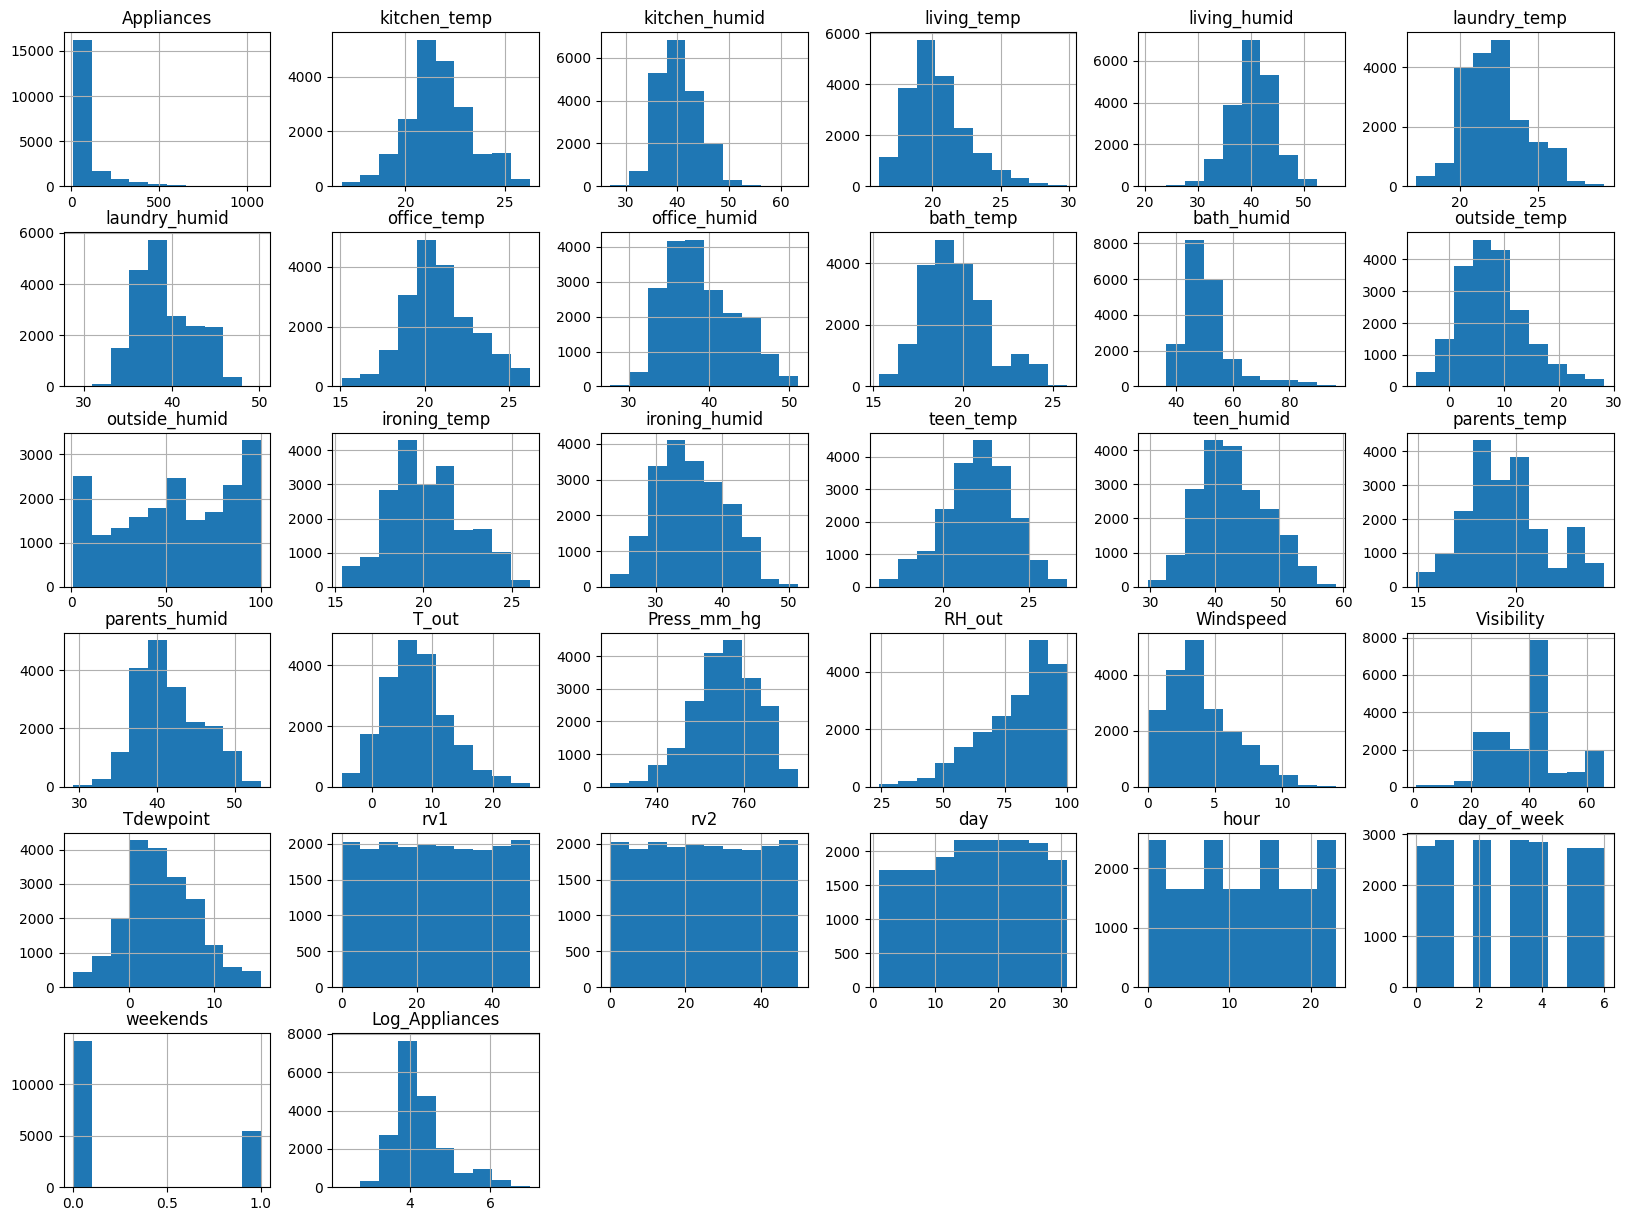

In [ ]:
# Chart - 8 visualization code

# Histogram of all the features to understand the distribution
data1.iloc[:,1:].hist(figsize=(20,15));

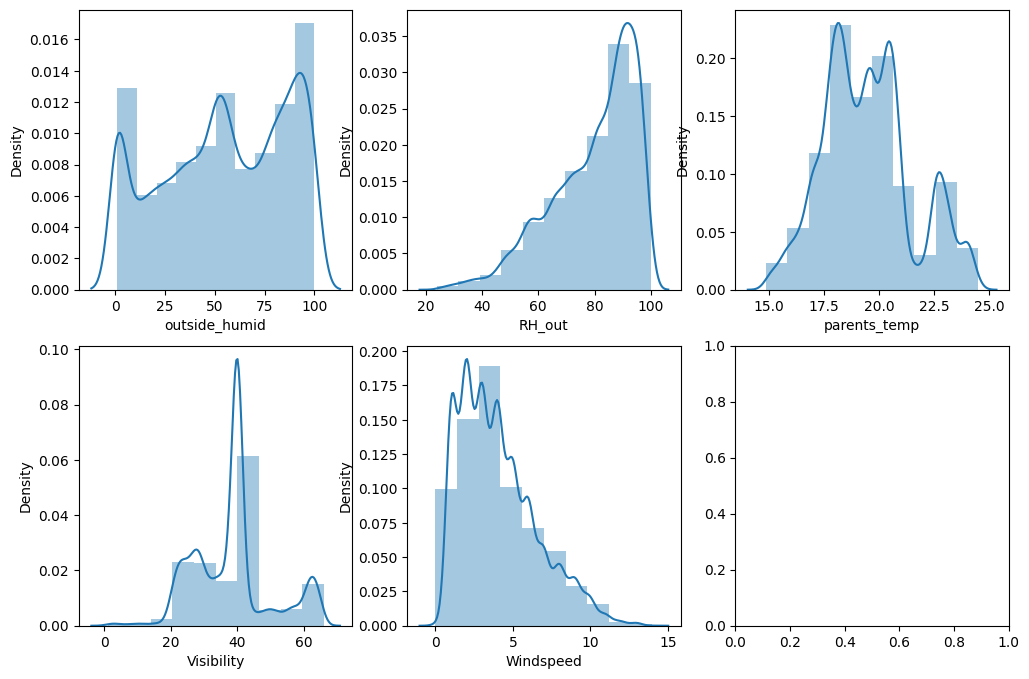

In [ ]:
# Focussed displots for outside_humid, RH_out, parents_temp, Visibility, Windspeed due to irregular distribution
f, ax = plt.subplots(2,3,figsize=(12,8))
focus1 = sns.distplot(data1["outside_humid"],bins=10, ax= ax[0][0])
focus2 = sns.distplot(data1["RH_out"],bins=10, ax=ax[0][1])
focus3 = sns.distplot(data1["parents_temp"],bins=10, ax= ax[0][2])
focus4 = sns.distplot(data1["Visibility"],bins=10, ax=ax[1][0])
focus5 = sns.distplot(data1["Windspeed"],bins=10, ax=ax[1][1])

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [ ]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [ ]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [ ]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot 

In [ ]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***